# Final Exam
Tiffany Kashima

## Packages:

In [4]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import scipy.stats
from itertools import repeat
import numpy as np
from PIL import Image
import plotly.express as px

## Webscraping

Spear Education (https://www.speareducation.com/) is an online and in-person provider of dental continuing education and certification, based in Scottsdale, Arizona.  They have a physical location where they provide live workshops and seminars for continuing education in both general and specialized area, as well as practice management.  Additionally, they have a large onine based education system of articles, video based learning, and and live education opportunities.  Finally, they have a dental pracrtice consulting branch that offers dental specific data analytics and dashboards.  Their customer base is primarily in North America, however, they serve international clients, as well. 

Prior to the intial wave of COVID-19 in the US, they held regular events in person at their campus in Scottsdale.  However, with the transition to in-home work, the cessation of non-essental business, and dental practices seeing a reduction in patient volume, there was an immediate need to shift the business to their online platform and to develop offerings focusing on dental practice specific to the pandemic.  

While most of the website is SPA and dynamically generated in JavaScript, they do have a static webiste for their dental journal, called Spear Digest (https://www.speareducation.com/spear-review/).  This webiste lists articles, previewed in card format with titles and brief descriptions.  It is easily sorted by date and thus, I was able to select approximately even samples that represented the time "pre-COVID" and "post-COVID".  I definted the "post" time as the time interval immediately after the first surge in the US, approximately 1.5 years ago.  This equated to 25 pages of journal summaries for each time interval group.  I was interested in article description content to see if there was a significant change in the language of the articles (and implied content) given their change in business focus.  


In [5]:
# auto-generating URLs for the pages of article summaries that correspond to "post" time period

spear_urls_post = {}
i=1
while i < 25:
    spear_urls_post.update({"URL"+str(i):"https://www.speareducation.com/spear-review/?page="+str(i)})
    i += 1

In [6]:
# use beautiful soup to extract article summaries for each page for "post" group and storing in spear_words_post

spear_words_post=[]
for value in spear_urls_post.values():
   page = requests.get(value)
   
   soup = BeautifulSoup(page.content, "html.parser")
   
   results = soup.find(id="article-body")
   
   article_elements = results.find_all("div", class_="article-body")
   
   for article_element in article_elements:
       description_element = article_element.find("p", class_="article-excerpt small")
       description_element = description_element.text.lower().strip()
       description_element = re.sub(r'[^\w\s]','',description_element)
       spear_words_post.extend(description_element.split()) 

In [8]:
# total number of words found in "post group"

len(spear_words_post)

6037

In [9]:
# removing stop words from word list with resulting number of words

spear_word_cloud_post = [word for word in spear_words_post if word not in STOPWORDS]
len(spear_word_cloud_post)

3942

In [10]:
# Using set() to create a dictionary of unique words and their counts

spear_words_counts_post = {}
spear_unique_words_post = set(spear_word_cloud_post)
for word in spear_unique_words_post:
    spear_words_counts_post.update({word:spear_word_cloud_post.count(word)})
    

In [11]:
# number of unique words

len(spear_unique_words_post)

1596

## Dataframe

Using the data created from the webscraper, I indexed a data frame by all the unique words and created two columns-- Count for counts of words and Type, with two levels: pre and post.  While I did not have any issues with NaN data, I did unexpectedly discover that there were more unique words with a 1 count than anticipated.  I kept this in mind when further subsetting the data, so that a disproportional amount of single count words were not included in the final analysis.  Not only would it not achieve any meaningful statistical comparison for my intended purpose, it would not be a particularly interesting analysis.  

There were 1596 unique words total for the "post" group (stop words removed), from a starting total of 6037 words.  After removing stopwords, there were 3942 words in the list.  

In [12]:
# creating a dataFrame from the unique word dictionarym indexed by word with variables count and group type

spear_post_df = pd.DataFrame.from_dict(spear_words_counts_post, orient='index')
spear_post_df = spear_post_df.rename({0:'Count'}, axis=1)
post = []
post.extend(repeat("post",1596))
spear_post_df['Type']= post
spear_post_df

,Count,Type
classification,2,post
optimize,4,post
kansasbased,1,post
mindset,3,post
practice,63,post
...,...,...
sustained,1,post
bond,1,post
exceptional,1,post
invaluable,4,post


Here I extracted the top 20 unique words into its own dataframe for the post group with the intention on using this 
data subset for graphing and analysis.  

In [13]:
# extracting the top 20 words from the dataFrame for the "post" group

spear_post_df20 = spear_post_df.sort_values("Count", ascending = False).head(20)
spear_post_df20


,Count,Type
dr,113,post
dental,98,post
practice,63,post
learn,48,post
patients,48,post
spear,47,post
new,46,post
dentists,33,post
patient,32,post
treatment,31,post


## Graph

I created a bar graph for the top twenty words of the "post" group using plotly express.  I chose a bar chart because it was appropriate as a visual for the counts of the data given it was not continuous.  Plus, it gave a clear indication of the word count for quick comparitive analysis.  The top twenty words in the "post" group were very generic dental terms, such as dr, dentist, dental, patients, learn, patients.  There seems to be more emphasis on the dental practice iself rather than anything tangential.  This also reflects that the business put more emphasis on practice development and recovery in comparison to patient based educaiton.  

In [14]:
# Create Bar Chart for Top 20 word frequency data for "post" group

fig = px.bar(spear_post_df20, x = spear_post_df20.index, y = 'Count', height = 500, 
            title='Top 20 Words for Post-Pandemic Spear Articles')
fig.show()

I also extracted the bottom twenty words out of curiousty, rather than intended for analysis since I knew they would all be single count words.

I graphed the bottom twenty words as a pie chart since it was more visually interesting than the bar chart, given all the counts were the same. The most interesting word from the bottom twenty were "ethical" which I was informed was reflective of a campaign for inclusiveness taken on at the same time as my "post" covid time interval.

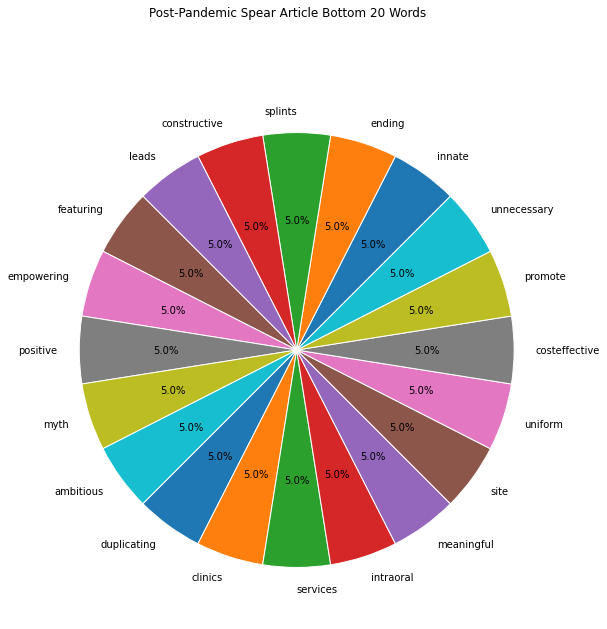

In [15]:
# extracting the bottom twenty words from the "post" data

spear_post_df_bottom = spear_post_df.sort_values("Count", ascending = False).tail(20)

# display as pie chart in matplotlib

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.pie(spear_post_df_bottom["Count"], labels = spear_post_df_bottom.index, autopct='%1.1f%%',
        wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False, startangle=45)       
plt.suptitle("Post-Pandemic Spear Article Bottom 20 Words")
plt.show()

I performed the same steps of data collection through webscraping with beautiful soup for the "pre" data set.  This consisted of the first 25 pages of article summaries, which corresponding the approximately 1.5 years ago.  The same steps for preparing data were performed by filtering stop words and storing in an organized dataframe.  

In [16]:
# auto-generating URLs for the pages of article summaries that correspond to "pre" time period

spear_urls_pre = {}
i=25
while i < 51:
    spear_urls_pre.update({"URL"+str(i):"https://www.speareducation.com/spear-review/?page="+str(i)})
    i += 1

In [17]:
# use beautiful soup to extract article summaries for each page for "pre" group and storing in spear_words_post

spear_words_pre=[]
for value in spear_urls_pre.values():
   page = requests.get(value)
   
   soup = BeautifulSoup(page.content, "html.parser")
   
   results = soup.find(id="article-body")
   
   article_elements = results.find_all("div", class_="article-body")
   
   for article_element in article_elements:
       description_element = article_element.find("p", class_="article-excerpt small")
       description_element = description_element.text.lower().strip()
       description_element = re.sub(r'[^\w\s]','',description_element)
       spear_words_pre.extend(description_element.split()) 

In [18]:
# total number of words found in "pre" group

len(spear_words_pre)

6152

In [19]:
# removing stop words from word list with resulting number of words

spear_word_cloud_pre = [word for word in spear_words_pre if word not in STOPWORDS]

In [20]:
# creating a dataFrame from the unique word dictionarym indexed by word with variables count and group type

spear_words_counts_pre = {}
spear_unique_words_pre = set(spear_word_cloud_pre)
for word in spear_unique_words_pre:
    spear_words_counts_pre.update({word:spear_word_cloud_pre.count(word)})
    

In comparison with the "post' dataset there were a total of 6152 words (non-unique) extracted from the "pre" group.  After removing stop words and accounting for only unique words, the data was trimmed to 1582 words.  

In [21]:
# number of words with stop words removed

len(spear_unique_words_pre)

1582

In [22]:
# creating a dataFrame from the unique word dictionarym indexed by word with variables count and group type

spear_pre_df = pd.DataFrame.from_dict(spear_words_counts_pre, orient='index')
spear_pre_df = spear_pre_df.rename({0:'Count'}, axis=1)
pre = []
pre.extend(repeat("pre",1582))
spear_pre_df['Type']= pre
spear_pre_df

,Count,Type
classification,1,pre
fpd,1,pre
optimize,1,pre
hex,1,pre
injured,1,pre
...,...,...
segment,1,pre
exceptional,1,pre
money,1,pre
insidious,1,pre


I graphed the top twenty words for the "pre" group in an identical process to the "post" group so there could be fair visual comparison.  The top twenty words for the "pre" group also contained typical dental jardon such as dentist, dental, patients, and doctor, but also included more words that referred to in person events -- such as "study" and "club" and "spear."

Similar to the "post" group, the bottom twenty words were all single count words that were interesting from a curisity viewpoint but not used in the analysis.  The most interesting words in this group were "expensive" and "money" because those topics became much more relevant during the pandemic when dental practices were limited and had a sharp decrease in revenue.  

In [23]:
# extracting the top 20 words from the dataFrame for the "pre" group

spear_pre_df20 = spear_pre_df.sort_values("Count", ascending = False).head(20)

# Create Bar Chart for Top 20 word frequency data in "pre" data

fig = px.bar(spear_pre_df20, x = spear_pre_df20.index, y = 'Count', height = 500, 
            title='Top 20 Words for Pre-Pandemic Spear Articles')
fig.show()

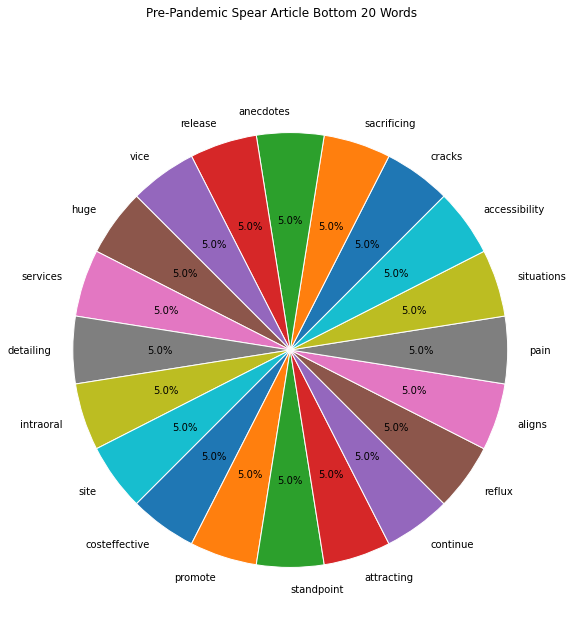

In [24]:
# extracting the bottom twenty words from the "pre" data

spear_pre_df_bottom = spear_pre_df.sort_values("Count", ascending = False).tail(20)

# display as pie chart in matplotlib

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.pie(spear_pre_df_bottom["Count"], labels = spear_pre_df_bottom.index, autopct='%1.1f%%',
        wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False, startangle=45)       
plt.suptitle("Pre-Pandemic Spear Article Bottom 20 Words")
plt.show()

I put the unique words, represented by their counts, into word cloud maps to visualize the distribution of each group
in visually interesting way.  Initially, I created just basic world cloud images to see the basic distribution and relative sizes of the words in each group.  While there were many words present in both lists (as an intersection of the groups), the "post" group had more focus on education terms, such as "seminar" and "learn" and "team" and "discover".  Spear Education had shifted their marketing focus during the pandemic to showing dentists that this was an ideal time to use the down time for their practice employees for online education and for pratice recovery strategy for the dentists, themselves.  

For the word clouds, I used the entire unique word lists instead of the top twenty lists because the increased number of words was more aesthetically pleasing and interesting in the word cloud format.  This was especially true when I moved to the goal of creating custom word cloud images.  

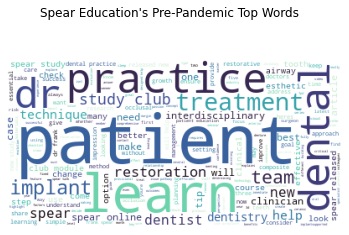

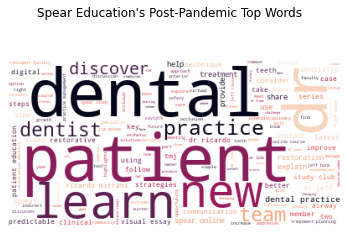

In [29]:
# saved the unique words from both pre and post groups to a list and then standardized the string format for Word Cloud

spear_word_cloud_pre = ' '.join(spear_words_pre).lower()
spear_word_cloud_post = ' '.join(spear_words_post).lower()

#Initially created a basic word cound cloud for each pre and post group

wordcloud = WordCloud(max_font_size = 80, background_color = "white", 
                      collocations = True, colormap = "mako").generate(spear_pre_words)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.suptitle("Spear Education's Pre-Pandemic Top Words")
plt.show()

wordcloud = WordCloud(max_font_size = 80, background_color = "white", 
                      collocations = True, colormap = "rocket").generate(spear_post_words)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.suptitle("Spear Education's Post-Pandemic Top Words")
plt.show()

My ultimate goal was to create custom word clouds that used the same datasets but in the shape of teeth, reflecting the theme of the project.  Using a black and white image of a tooth found online, I processed it so that the computer delineated between the black and white colors in order to create an outline of the tooth that could be filled with image generated by the word cloud.  The most difficult step of this process was fine tuning the sensitivity of the detection of the outline of the image by the computer.  Once this was complete, I chose color maps that best filled the shape and provided some contrast.  The resulting word clouds follow below for each group.  

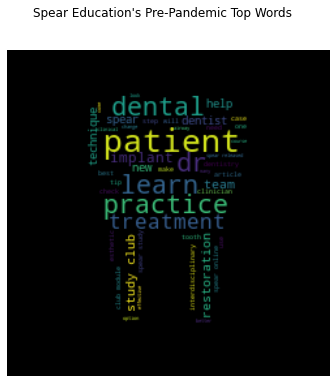

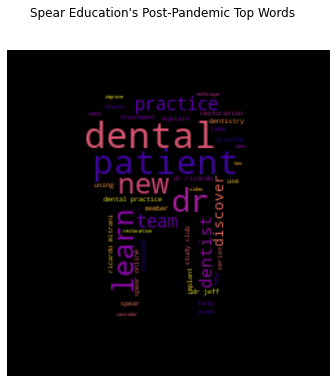

In [31]:
# Used word cloud and a custom tooth photo to create custom word clouds in the shape of teeth.  Customied color
# and used the same word lists for pre- and post- groups.  

cand_mask=np.array(Image.open('/Users/tk/ASU/DAT301/data/tooth copy.png'))
cand_mask=np.where(cand_mask > 40, 255, cand_mask)

wordcloud = WordCloud(background_color='black',
                      contour_color='black',
                      mask=cand_mask, 
                      colormap='viridis',
                      contour_width=1).generate(spear_pre_words)

plt.figure(figsize=(6,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.suptitle("Spear Education's Pre-Pandemic Top Words")
plt.axis('off')
plt.show()

wordcloud = WordCloud(background_color='black',
                      contour_color='black',
                      mask=cand_mask, 
                      colormap='plasma',
                      contour_width=1).generate(spear_post_words)

plt.figure(figsize=(6,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.suptitle("Spear Education's Post-Pandemic Top Words")
plt.axis('off')
plt.show()

## Statistical Analysis

Finally, I prepared each data frame for statistical analysis.  I made new dataframes, reindexed with standard integers, and added the "Words" as its own column.  This was done for each group and their top twenty words.  I also made a data frame that combined these two groups (preserving the structure and just concatonating to each other) so that it could be used in sns to generate a box plot.  

In [32]:
# re-indexed pre-group

spear_pre_df20['Words'] = spear_pre_df20.index
spear_pre_df20.reset_index(drop=True)

,Count,Type,Words
0,66,pre,spear
1,52,pre,dental
2,50,pre,patients
3,48,pre,dr
4,45,pre,practice
5,42,pre,learn
6,35,pre,new
7,32,pre,treatment
8,31,pre,help
9,30,pre,patient


In [33]:
# re-indexed post-group

spear_post_df20['Words'] = spear_post_df20.index
spear_post_df20.reset_index(drop=True)

,Count,Type,Words
0,113,post,dr
1,98,post,dental
2,63,post,practice
3,48,post,learn
4,48,post,patients
5,47,post,spear
6,46,post,new
7,33,post,dentists
8,32,post,patient
9,31,post,treatment


In [34]:
#combined reindexed data frames of top 20 words

df_combined = spear_pre_df20.append(spear_post_df20, ignore_index=True)
df_combined

,Count,Type,Words
0,66,pre,spear
1,52,pre,dental
2,50,pre,patients
3,48,pre,dr
4,45,pre,practice
5,42,pre,learn
6,35,pre,new
7,32,pre,treatment
8,31,pre,help
9,30,pre,patient


The boxplot produced by seaborn compares the twp groups, pre and post, accpording to the spread and centrality of the each dataset.  Visually, there does not seem to be a signficant difference in the centrality of the word frequencies, but there are more outliers in the "post" group and that dataset appears to be a little more skewed than the "pre" dataset.  

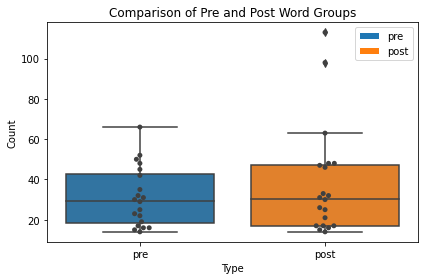

In [35]:
# used combined data frame to produce sns boxplot comparing the summary statistcs for both pre and post groups

sns.boxplot(x = "Type", y = "Count", data = df_combined).set_title("Comparison of Pre and Post Word Groups")
sns.swarmplot(x = "Type", y = "Count", data = df_combined, color=".25")
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles, ["pre", "post"])
plt.tight_layout()
plt.show()


Looking at the summary statistics for each "pre" and "post" group revealed that there were more words with repetition in the "post" group than the "post" group.  One conclusion that could be inferred from this is that the content in the article topics in the post group followed more of a shared theme in comparison to the "pre" group.  

In [36]:
# produced numeric summary statistics for the pre and post groups to get a general idea of the differences between them

df_combined.groupby("Type").agg({"Count":["min", "max", "mean", "std", "count"]})

Count                             
       min  max   mean        std count
Type                                   
post    14  113  37.85  27.030733    20
pre     14   66  31.35  14.812068    20

I used the paired t-test to see if there was a significant difference in the mean frequency counts of the words in each group.  The paried t-test was selected becaue the two variables came from essentially the same sample and were only separated by time.  Thus, the two groups do not stricly meet the assumption of indepedence for the two sample t-test.  There were contectually many shared, dependent features of each group (such as authors) that were not experimentally controlled for independence.  

For the paired t-test I used the following null and alternative hypothesis:

&nbsp;  H<sub>o</sub>: $\mu$<sub>pre</sub> = $\mu$<sub>post</sub><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;H<sub>a</sub>: $\mu$<sub>pre</sub> does not equal $\mu$<sub>post</sub>

with a pre-determined significant value of alpha = .05.

The result of the paired t-test was a T-statistic of 2.05 with a p-value of .0544, which just barely did not meet our significance threshold in our hypothesis.  Thus, we cannot reject the null hypothesis and conclude there is not sufficient evidence of a difference in the mean word frequencies of the pre and post groups.

In [38]:
# used t-test for the means of paried datasets (the data groups come froom the same sample), using an alpha of .05

scipy.stats.ttest_rel(spear_post_df20['Count'], spear_pre_df20['Count'])

Ttest_relResult(statistic=2.050360968098663, pvalue=0.054383811982895956)

## Follow-Up

If I were to do further exploration on this topic, it could be improved by adding more dental specific jargon to stop words.  I also could include the content of the entire articles rather than just the summaries to see more nuance in diversity and differences between the groups.  I also could perform a similar analysis on the education content itself, such as the synopsis of seminars and workshops for the same time periods using more advanced web scraping technniques.  